In [76]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_circles

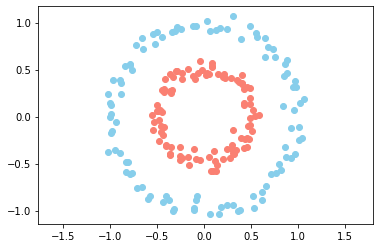

In [72]:
# CREAR EL DATASET (CERCLES, 0 o 1 en aquest cas)

n = 200 #Num de registres
p = 2   # Característiques de cada registre

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) #Afegim soroll pèr fer-ho realista

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue") #cada una de les característiques de la matriu per l'index X
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal") # Li diem a matplotlib que els eixos X i Y tinguin la mateixa proporció
plt.show()
 

In [30]:
#ESTRUCTURA DE LES DADES
#CLASSE DE LA CAPA DE LA XARXA
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f #Funció d'activació
    self.b = np.random.rand(1, n_neur) * 2 - 1 #Tants parametres com neurones te la capa, random torne 0 o 1, aixi que ho fem per -1 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # es una matriu

In [31]:
#FUNCIONS D'ACTIVACIÓ

sigm = (lambda x: 1 / (1 + np.e ** (-x)), # Funció sigmoide anonima
        lambda x: x * (1 - x))            # la derivada de la funció sigmoide


In [67]:
#CREEM LA XARXA NEURONAL

topology = [p, 4, 8, 1]

def create_nn(topology, act_f):

  nn = [] #Vector que guarde les capes de la xarxa
  
  for l, layer in enumerate(topology[:-1]): #Descartem l'últim valor per evitar overflow del vector topology

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn



In [61]:
neural_net = create_nn(topology, sigm) #PROBA creem la xarxa neurional buida
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #Error quadratic mitjà
           lambda Yp, Yr: (Yp - Yr))                # La seva derivada

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True): #funció d'aprenentatje amb el learning rate

  out = [(None, X)]

  #FORDWARD PASS
  for l, layer in enumerate(neural_net):  # Tot el procesament cap endavant de la xarxa neuronal

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  #print(l2_cost[0](out[-1][1], Y)) #Imprimim l'error de la xarxa neuronal

  if train:

    #BACKWARD PASS - propagar l'error de la xarxa cap a darrere
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1] #ACTIVACIÓ,m els dos valors inicials per cada capa

      if l == len(neural_net) - 1:
        #Calcular delta última capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) #formula de delta 0

      else:
        #Calcular delta respecte a capa prèvia
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W  #Guardem la W per la següent iteració

      #GRADIENT DESCENT
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

    return out[-1][1]


train(neural_net, X, Y, l2_cost, 0.5)
print("")


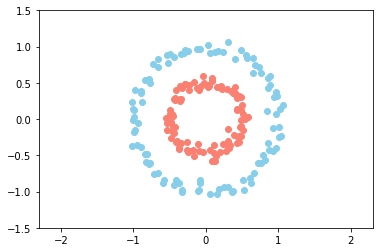

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [91]:
# CODI PER COMPROVAR QUE LA XARXA FUNCIONE
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):

  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False) # He tret [0][0] del final, no se que hi feie

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] ==0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] ==1, 1], c="salmon")
    
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    
    time.sleep(0.5)